### Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import skew, kurtosis
import numpy as np
import seaborn as sns
import scipy.stats as stats


# Load the dataset
df = pd.read_csv('Dataset.csv')

# Read in the CSV file
df = pd.read_csv('Dataset.csv')
df

C:\Users\SH\AppData\Local\Temp\ipykernel_1868\1593538568.py:12: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')
C:\Users\SH\AppData\Local\Temp\ipykernel_1868\1593538568.py:15: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585100


### Transpose and Clean the DataFrame

In [2]:
# Transpose the DataFrame
df_transposed = df.transpose()

# Clean the transposed DataFrame
df_transposed_cleaned = df_transposed.dropna()

print("Original DataFrame:")
print(df)
print("\nTransposed DataFrame:")
print(df_transposed)
print("\nCleaned Transposed DataFrame:")
print(df_transposed_cleaned)

Original DataFrame:
      Country Name Country Code                            Indicator Name  \
0            Aruba          ABW  Urban population (% of total population)   
1            Aruba          ABW                          Urban population   
2            Aruba          ABW        Urban population growth (annual %)   
3            Aruba          ABW                         Population, total   
4            Aruba          ABW              Population growth (annual %)   
...            ...          ...                                       ...   
20199          NaN          NaN                                       NaN   
20200          NaN          NaN                                       NaN   
20201          NaN          NaN                                       NaN   
20202          NaN          NaN                                       NaN   
20203          NaN          NaN                                       NaN   

          Indicator Code       1960          1961      

In [3]:
# Remove NaN values
df_cleaned = df.dropna()
df = df_cleaned
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,...,4.295700e+01,4.299000e+01,4.304100e+01,4.310800e+01,4.319200e+01,4.329300e+01,4.341100e+01,4.354600e+01,4.369700e+01,4.386600e+01
1,Aruba,ABW,Urban population,SP.URB.TOTL,2.772800e+04,2.833000e+04,2.876400e+04,2.915700e+04,2.950500e+04,2.980200e+04,...,4.386400e+04,4.422800e+04,4.458800e+04,4.494300e+04,4.529700e+04,4.564800e+04,4.599900e+04,4.635100e+04,4.657400e+04,4.673400e+04
3,Aruba,ABW,"Population, total",SP.POP.TOTL,5.460800e+04,5.581100e+04,5.668200e+04,5.747500e+04,5.817800e+04,5.878200e+04,...,1.021120e+05,1.028800e+05,1.035940e+05,1.042570e+05,1.048740e+05,1.054390e+05,1.059620e+05,1.064420e+05,1.065850e+05,1.065370e+05
76,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1.456381e+01,1.481141e+01,1.506925e+01,1.534798e+01,1.564019e+01,1.594128e+01,...,3.304047e+01,3.347621e+01,3.393696e+01,3.442558e+01,3.489475e+01,3.535890e+01,3.584760e+01,3.633626e+01,3.682830e+01,3.732370e+01
77,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,1.903382e+07,1.987235e+07,2.077079e+07,2.173742e+07,2.277306e+07,2.387085e+07,...,1.825587e+08,1.901087e+08,1.980733e+08,2.065563e+08,2.150833e+08,2.237321e+08,2.329222e+08,2.424510e+08,2.523154e+08,2.623769e+08
79,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,...,5.525307e+08,5.678919e+08,5.836508e+08,6.000082e+08,6.163773e+08,6.327463e+08,6.497569e+08,6.672427e+08,6.851127e+08,7.029768e+08
95,Africa Eastern and Southern,AFE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,6.444405e+00,6.564937e+00,6.690929e+00,6.815871e+00,6.947877e+00,7.085666e+00,...,1.349369e+01,1.365722e+01,1.381416e+01,1.393429e+01,1.406590e+01,1.420788e+01,1.433700e+01,1.445516e+01,1.458105e+01,1.472133e+01
152,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000e+00,8.684000e+00,8.976000e+00,9.276000e+00,9.586000e+00,9.904000e+00,...,2.416000e+01,2.437300e+01,2.458700e+01,2.480300e+01,2.502000e+01,2.525000e+01,2.549500e+01,2.575400e+01,2.602600e+01,2.631400e+01
153,Afghanistan,AFG,Urban population,SP.URB.TOTL,7.243730e+05,7.633360e+05,8.050620e+05,8.494460e+05,8.968200e+05,9.473320e+05,...,7.360701e+06,7.687539e+06,8.043935e+06,8.371880e+06,8.665979e+06,8.999963e+06,9.353296e+06,9.727157e+06,1.014291e+07,1.055177e+07
155,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.046648e+07,3.154121e+07,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07


In [4]:
# Define a dictionary to map country names to abbreviations
country_dict = {
    'Aruba': 'ARU',
    'Africa Eastern and Southern': 'AES',
    'Afghanistan': 'AFG',
    'Africa Western and Central': 'AWC',
    'Angola': 'ANG',
    'Albania': 'ALB',
    'Andorra': 'AND',
    # ... and so on
}

# Replace country names with abbreviations
df['Country Name'] = df['Country Name'].replace(country_dict)

df

C:\Users\SH\AppData\Local\Temp\ipykernel_1868\933050244.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country Name'] = df['Country Name'].replace(country_dict)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ARU,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,5.077600e+01,5.076100e+01,5.074600e+01,5.073000e+01,5.071500e+01,5.070000e+01,...,4.295700e+01,4.299000e+01,4.304100e+01,4.310800e+01,4.319200e+01,4.329300e+01,4.341100e+01,4.354600e+01,4.369700e+01,4.386600e+01
1,ARU,ABW,Urban population,SP.URB.TOTL,2.772800e+04,2.833000e+04,2.876400e+04,2.915700e+04,2.950500e+04,2.980200e+04,...,4.386400e+04,4.422800e+04,4.458800e+04,4.494300e+04,4.529700e+04,4.564800e+04,4.599900e+04,4.635100e+04,4.657400e+04,4.673400e+04
3,ARU,ABW,"Population, total",SP.POP.TOTL,5.460800e+04,5.581100e+04,5.668200e+04,5.747500e+04,5.817800e+04,5.878200e+04,...,1.021120e+05,1.028800e+05,1.035940e+05,1.042570e+05,1.048740e+05,1.054390e+05,1.059620e+05,1.064420e+05,1.065850e+05,1.065370e+05
76,AES,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1.456381e+01,1.481141e+01,1.506925e+01,1.534798e+01,1.564019e+01,1.594128e+01,...,3.304047e+01,3.347621e+01,3.393696e+01,3.442558e+01,3.489475e+01,3.535890e+01,3.584760e+01,3.633626e+01,3.682830e+01,3.732370e+01
77,AES,AFE,Urban population,SP.URB.TOTL,1.903382e+07,1.987235e+07,2.077079e+07,2.173742e+07,2.277306e+07,2.387085e+07,...,1.825587e+08,1.901087e+08,1.980733e+08,2.065563e+08,2.150833e+08,2.237321e+08,2.329222e+08,2.424510e+08,2.523154e+08,2.623769e+08
79,AES,AFE,"Population, total",SP.POP.TOTL,1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,...,5.525307e+08,5.678919e+08,5.836508e+08,6.000082e+08,6.163773e+08,6.327463e+08,6.497569e+08,6.672427e+08,6.851127e+08,7.029768e+08
95,AES,AFE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,6.444405e+00,6.564937e+00,6.690929e+00,6.815871e+00,6.947877e+00,7.085666e+00,...,1.349369e+01,1.365722e+01,1.381416e+01,1.393429e+01,1.406590e+01,1.420788e+01,1.433700e+01,1.445516e+01,1.458105e+01,1.472133e+01
152,AFG,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000e+00,8.684000e+00,8.976000e+00,9.276000e+00,9.586000e+00,9.904000e+00,...,2.416000e+01,2.437300e+01,2.458700e+01,2.480300e+01,2.502000e+01,2.525000e+01,2.549500e+01,2.575400e+01,2.602600e+01,2.631400e+01
153,AFG,AFG,Urban population,SP.URB.TOTL,7.243730e+05,7.633360e+05,8.050620e+05,8.494460e+05,8.968200e+05,9.473320e+05,...,7.360701e+06,7.687539e+06,8.043935e+06,8.371880e+06,8.665979e+06,8.999963e+06,9.353296e+06,9.727157e+06,1.014291e+07,1.055177e+07
155,AFG,AFG,"Population, total",SP.POP.TOTL,8.622466e+06,8.790140e+06,8.969047e+06,9.157465e+06,9.355514e+06,9.565147e+06,...,3.046648e+07,3.154121e+07,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07


In [5]:
x = df['Country Name']
y = df['Indicator Name']

### Line Chart Between Indicator Name (Urban Population) and Year (1960-1966)

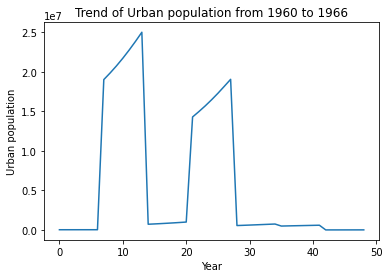

In [6]:

# Select the indicator you want to plot
indicator = "Urban population"

# Extract the data for the indicator
indicator_data = df.loc[df["Indicator Name"] == indicator, "1960":"1966"].values.flatten()

# Create a line chart
plt.plot(indicator_data)
plt.xlabel("Year")
plt.ylabel(indicator)
plt.title("Trend of " + indicator + " from 1960 to 1966")
plt.show()

### Line Chart Between Indicator (Mortality Rate) and Year (1960 -1966)

C:\Users\SH\AppData\Local\Temp\ipykernel_1868\3439866901.py:2: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset.csv")


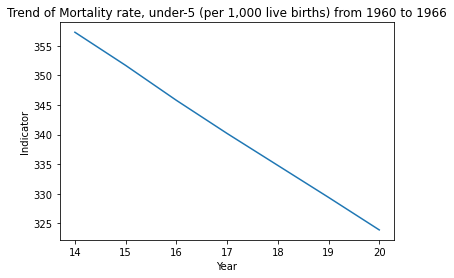

In [7]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv("Dataset.csv")

# Select the indicator you want to plot
indicator = "Mortality rate, under-5 (per 1,000 live births)"

# Extract the data for the indicator
indicator_data = df.loc[df["Indicator Name"] == indicator, "1960":"1966"].values.flatten()

plt.plot(indicator_data)
plt.xlabel("Year")
plt.ylabel("Indicator")
plt.title("Trend of " + indicator + " from 1960 to 1966")
plt.show()

### Line Chart Between Indicator (Population, Total) and Year (1960 -1966)

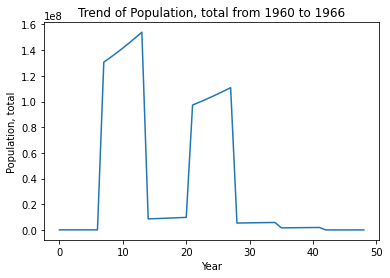

In [8]:


# Select the indicator you want to plot
indicator = "Population, total"

# Extract the data for the indicator
indicator_data = df.loc[df["Indicator Name"] == indicator, "1960":"1966"].values.flatten()

# Create a line chart
plt.plot(indicator_data)
plt.xlabel("Year")
plt.ylabel(indicator)
plt.title("Trend of " + indicator + " from 1960 to 1966")
plt.show()

### Heat Map For Country and Indicators

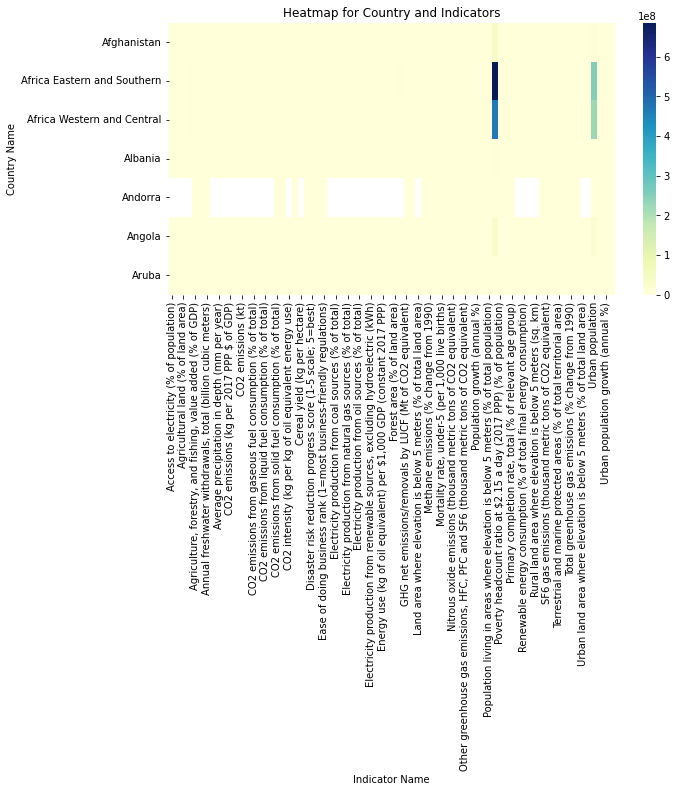

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Group by country and indicator to get the total value for each country and indicator
grouped_df = df.groupby(['Country Name', 'Indicator Name'])['2020'].sum().reset_index()

# Create a larger figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Create a heatmap with country on the y-axis, indicator on the x-axis, and value as the color
heatmap_df = grouped_df.pivot(index='Country Name', columns='Indicator Name', values='2020')
sns.heatmap(heatmap_df, cmap='YlGnBu')
plt.title("Heatmap for Country and Indicators")

plt.show()

### Bar Graph for Indicator Names and Year (2020)

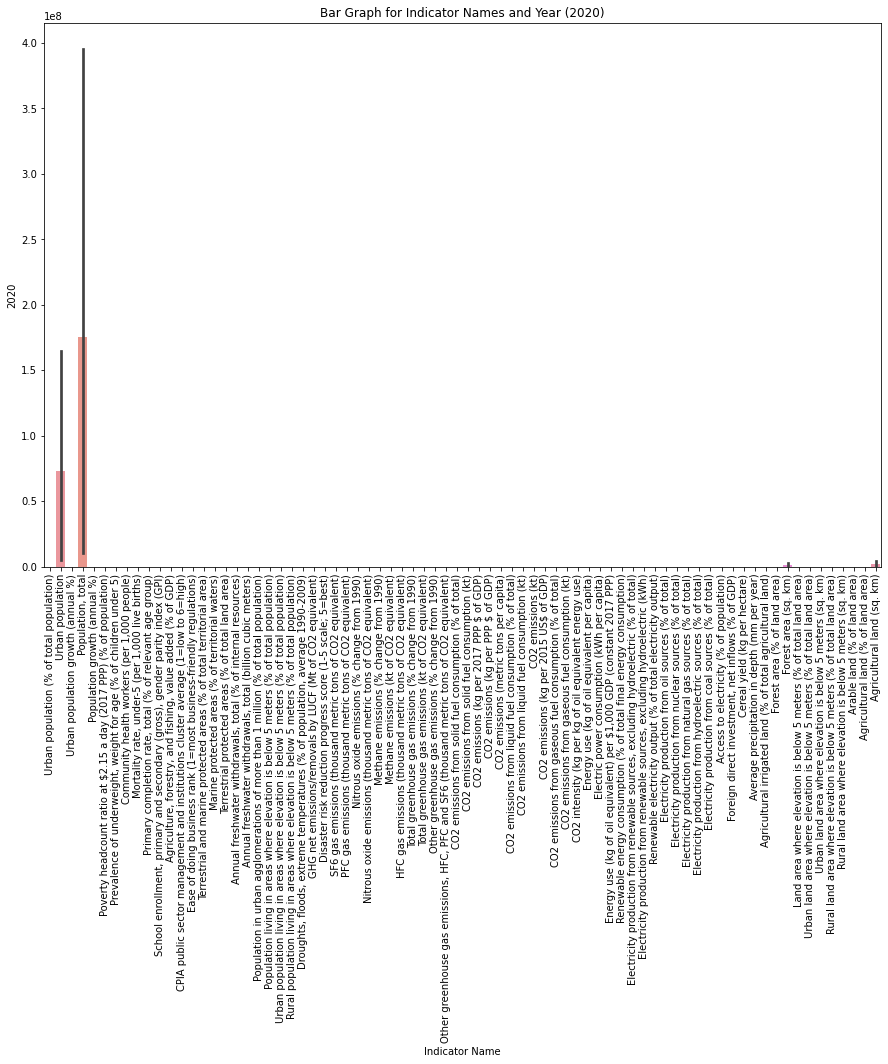

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a larger figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create a bar plot with Indicator Name on the x-axis and the value for 2020 on the y-axis
sns.barplot(x='Indicator Name', y='2020', data=df)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.title("Bar Graph for Indicator Names and Year (2020)")

plt.show()

### Scatter Plot Between Indicator Names and Year (2020)

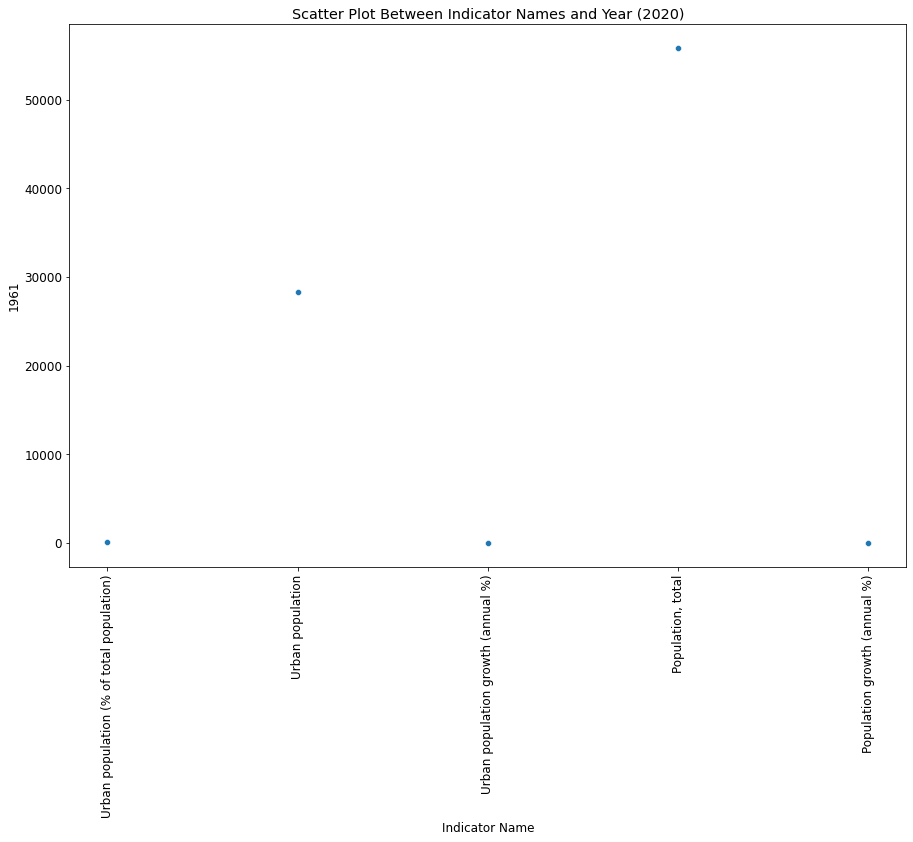

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font size globally
plt.rcParams.update({'font.size': 12})

subset = df.head(10)

# Create a larger figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create a scatter plot with Indicator Name on the x-axis and the value for 2020 on the y-axis
sns.scatterplot(x='Indicator Name', y='1961', data=subset)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.title("Scatter Plot Between Indicator Names and Year (2020)")

plt.show()


# Heat Map

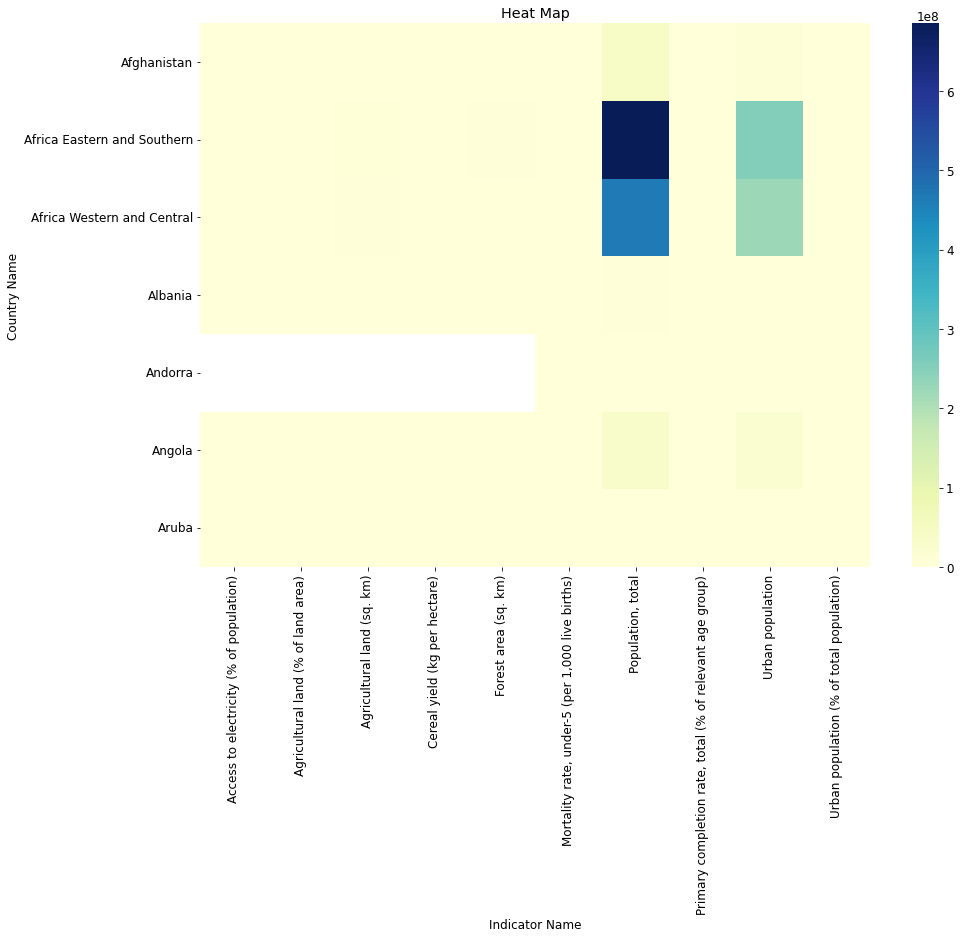

In [12]:
# Group by country and indicator to get the total value for each country and indicator
grouped_df = df.groupby(['Country Name', 'Indicator Name'])['2020'].sum().reset_index()

# Get the top 10 indicator names with the highest total value for 2020
top_indicator_names = grouped_df.groupby('Indicator Name')['2020'].sum().nlargest(10).index.tolist()

# Filter the dataframe to only include the top 10 indicator names
grouped_df = grouped_df[grouped_df['Indicator Name'].isin(top_indicator_names)]

# Create a larger figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create a heatmap with country on the y-axis, indicator on the x-axis, and value as the color
heatmap_df = grouped_df.pivot(index='Country Name', columns='Indicator Name', values='2020')
sns.heatmap(heatmap_df, cmap='YlGnBu')
plt.title("Heat Map")


plt.show()


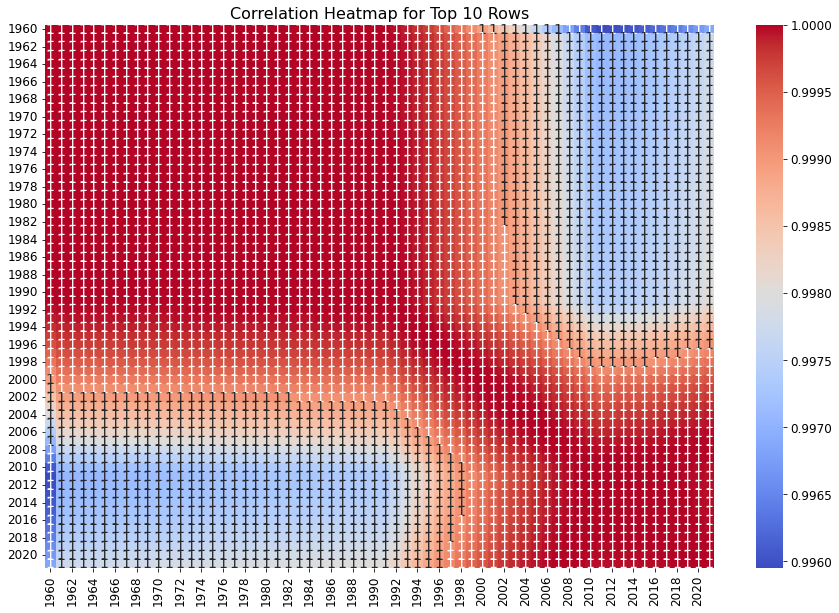

In [13]:
# Subset the data to include only the top 10 rows
subset_df = df.iloc[:10, :]

# Create a correlation matrix for the subset
corr_matrix = subset_df.corr()

# Create a larger figure and axes for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the correlation heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={'fontsize':14}, ax=ax)

# Set the title of the plot
plt.title("Correlation Heatmap for Top 10 Rows", fontsize=16)

# Increase the font size of the x-axis and y-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

### Srongest Positive Correlation

In [14]:
corr_matrix=df.corr()

strongest_positive_corr = corr_matrix.idxmax().values

# Print the result
print('The columns with the strongest positive correlation are:', strongest_positive_corr)

The columns with the strongest positive correlation are: ['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021']


### Strongest Negative Correlation

In [15]:
strongest_negative_corr = corr_matrix.idxmin().values

# Print the result
print('The columns with the strongest negative correlation are:', strongest_negative_corr)

The columns with the strongest negative correlation are: ['2021' '2021' '2021' '2021' '2021' '2021' '2021' '2021' '2021' '2021'
 '2021' '2015' '2015' '2015' '2015' '2015' '2015' '2015' '2015' '2015'
 '2015' '2015' '2015' '2015' '2015' '2015' '1975' '1975' '1975' '1975'
 '1975' '1975' '1975' '1975' '2015' '1975' '1975' '1975' '1975' '1975'
 '1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975'
 '1975' '1975' '1975' '1975' '1975' '1975' '1960' '1960' '1960' '1960'
 '1960' '1960']


### Statistics

In [16]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,5.300000e+01,9.300000e+01,9.300000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,...,2.800000e+02,2.650000e+02,2.640000e+02,2.950000e+02,2.290000e+02,1.920000e+02,1.930000e+02,1.920000e+02,1.260000e+02,3.240000e+03
mean,5.262768e+06,3.186936e+06,3.271210e+06,3.323715e+06,3.414929e+06,3.510153e+06,3.607492e+06,3.708259e+06,3.813747e+06,3.924314e+06,...,1.655131e+07,2.005608e+07,3.556394e+07,4.312249e+07,6.819973e+06,8.375897e+06,8.586973e+06,8.894095e+06,1.392545e+07,4.068436e+07
std,2.225075e+07,1.735116e+07,1.779572e+07,1.816271e+07,1.864283e+07,1.914262e+07,1.965500e+07,2.018422e+07,2.073674e+07,2.130959e+07,...,1.876260e+08,2.298168e+08,4.751693e+08,6.375787e+08,5.259392e+07,5.900473e+07,6.054043e+07,6.242953e+07,7.894544e+07,3.399425e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.194347e-01,-2.659222e-01,...,-7.945488e+01,-5.337281e+00,-4.165378e+02,-6.912025e+02,-1.800004e+03,-1.072495e+01,-8.299051e+00,-5.913333e+00,-3.480978e+00,-1.174203e+02
25%,8.401000e+00,4.977924e+00,5.151810e+00,4.962561e+00,5.220648e+00,5.162357e+00,5.556148e+00,6.358408e+00,6.758684e+00,5.297411e+00,...,9.884618e-01,2.064723e+00,1.827294e+00,7.641135e-01,2.018266e+00,2.213195e+00,2.333333e+00,2.533333e+00,4.097783e+00,2.313692e+00
50%,8.434100e+01,4.496350e+01,4.496350e+01,4.368315e+01,4.780276e+01,4.792299e+01,4.797024e+01,4.803573e+01,4.795474e+01,4.785600e+01,...,2.899130e+01,3.300300e+01,3.191247e+01,1.659090e+01,2.221628e+01,2.003566e+01,2.000000e+01,2.177332e+01,2.094161e+01,1.504148e+01
75%,1.904254e+04,1.818832e+03,1.958178e+03,1.608863e+03,1.523605e+03,1.589611e+03,1.795880e+03,1.809631e+03,2.027574e+03,2.431221e+03,...,7.038061e+02,8.144000e+02,8.766095e+02,4.916953e+02,1.496136e+03,1.214430e+03,1.080000e+03,1.160866e+03,9.942500e+01,9.803029e+01
max,1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,1.539555e+08,1.583132e+08,1.628752e+08,1.675962e+08,...,3.058000e+09,3.669000e+09,7.687000e+09,1.092600e+10,6.163773e+08,6.327463e+08,6.497569e+08,6.672427e+08,6.851127e+08,7.888409e+09


In [17]:
data = {
    'Country Name': ['Aruba', 'Afghanistan', 'Africa Western and Central'],
    'Country Code': ['ABW', 'AFG', 'AFW'],
    'Indicator Name': ['Urban population (% of total population)', 'Population growth (annual %)', 'Population, total'],
    'Indicator Code': ['SP.URB.TOTL.IN.ZS', 'SP.POP.GROW', 'SP.POP.TOTL'],
    '1960': [50.776, 40.693, 59.492],
    '1961': [50.761, 40.316, 69.515],
    '1962': [50.746, 39.936, 59.716],
    '1963': [50.73, 39.553, 52.932],
    '1964': [50.715, 39.167, 59.218],
    '1965': [50.7, 38.778, 59.833]
}

df = pd.DataFrame(data)

# Calculate skewness and kurtosis for each column
skewness = df.skew()


print("Skewness:\n", skewness)


Skewness:
 1960   -0.217447
1961    0.812879
1962   -0.277600
1963   -1.550268
1964   -0.449231
1965   -0.393159
dtype: float64


C:\Users\SH\AppData\Local\Temp\ipykernel_1868\1169578011.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()


In [18]:
from scipy.stats import ttest_ind


# Calculate the mean and standard deviation of a column
mean = df['1960'].mean()
std = df['1964'].std()

# Calculate the z-score of a column
z_score = (df['1960'] - mean) / std


# Calculate the correlation coefficient between two columns
corr_coef = df['1960'].corr(df['1964'])

# Calculate the skewness and kurtosis of a column
skewness = df['1960'].skew()
kurtosis = df['1960'].kurt()


In [19]:
print("Mean :",mean)
print("Standard Deviation :",std)
print("Z-Score :",z_score)
print("Correlation Coefficient :",corr_coef)

print("Skewness :",skewness)
print("Kurtosis :",kurtosis)

Mean : 50.32033333333333
Standard Deviation : 10.063961396984789
Z-Score : 0    0.045277
1   -0.956615
2    0.911338
Name: 1960, dtype: float64
Correlation Coefficient : 0.9989652341727843
Skewness : -0.21744658310169585
Kurtosis : nan


In [20]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)


          1960      1961      1962      1963      1964      1965
1960  1.000000  0.979102  0.999932  0.946832  0.998965  0.999409
1961  0.979102  1.000000  0.976657  0.861616  0.968840  0.971536
1962  0.999932  0.976657  1.000000  0.950531  0.999429  0.999743
1963  0.946832  0.861616  0.950531  1.000000  0.960485  0.957329
1964  0.998965  0.968840  0.999429  0.960485  1.000000  0.999938
1965  0.999409  0.971536  0.999743  0.957329  0.999938  1.000000


### NumPy and Pandas for Descriptive Statistics

In [21]:
# Calculate basic statistics using NumPy and Pandas
mean_gdp = np.mean(df['1960'])
median_gdp = np.median(df['1961'])
max_population = np.max(df['1962'])
min_population = np.min(df['1963'])

print("Mean GDP:", mean_gdp)
print("Median GDP:", median_gdp)
print("Max Population:", max_population)
print("Min Population:", min_population)

Mean GDP: 50.32033333333333
Median GDP: 50.761
Max Population: 59.716
Min Population: 39.553


### Visualize the data using Seaborn

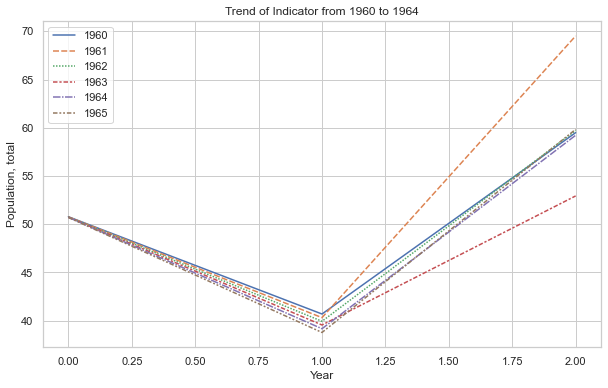

In [22]:
# Visualize the data using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.iloc[:, 4:])
plt.xlabel('Year')
plt.ylabel('Population, total')
plt.title('Trend of Indicator from 1960 to 1964')
plt.show()